# Aswathi Ajith
 

## TASK - 2 Exploratory Data Analysis 

### Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes.

In [2]:
price_df = pd.read_csv("Downloads/price_data (1).csv")
client_df = pd.read_csv("Downloads/client_data (1).csv")

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data


In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 10.3+ MB


In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### We need to change the dtype of the dates 

In [7]:
dates= [ 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for i in dates:
    client_df[i] = pd.to_datetime(client_df[i])
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.0+ MB


### To check the missing values

In [10]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [11]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

#### No missing values in the dataset

## Statistics

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


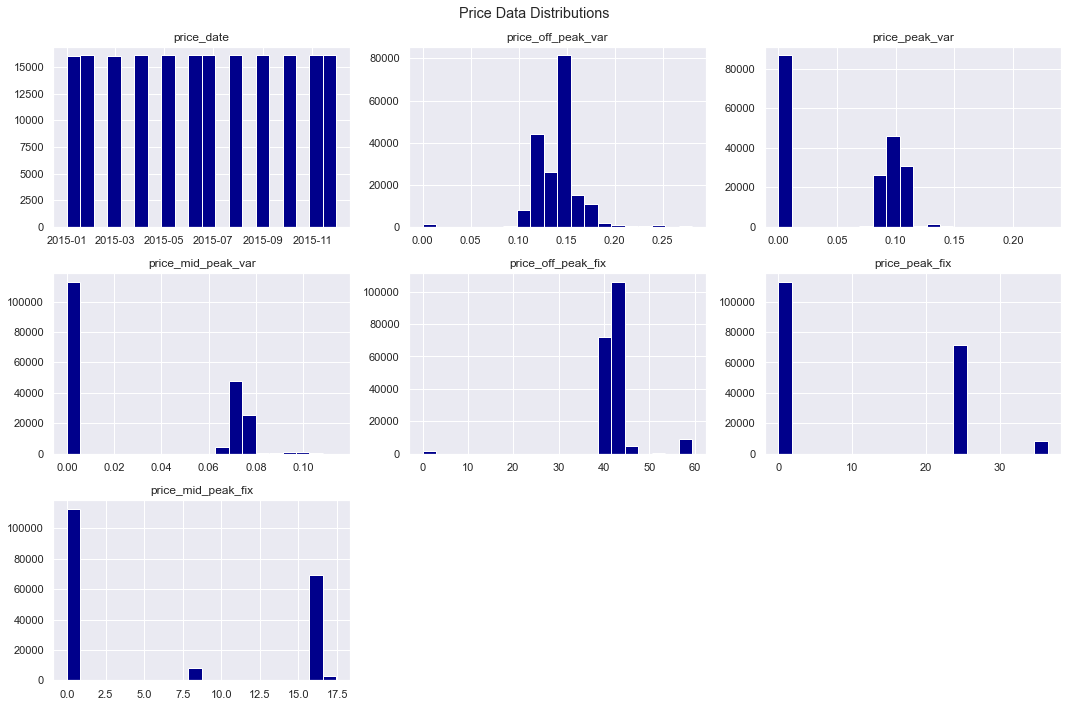

In [221]:
# Visualize distributions of numerical columns (Price Data)
price_df.hist(bins=20, figsize=(15, 10), edgecolor='white', color='darkblue')
plt.suptitle("Price Data Distributions")
plt.tight_layout()
plt.show()

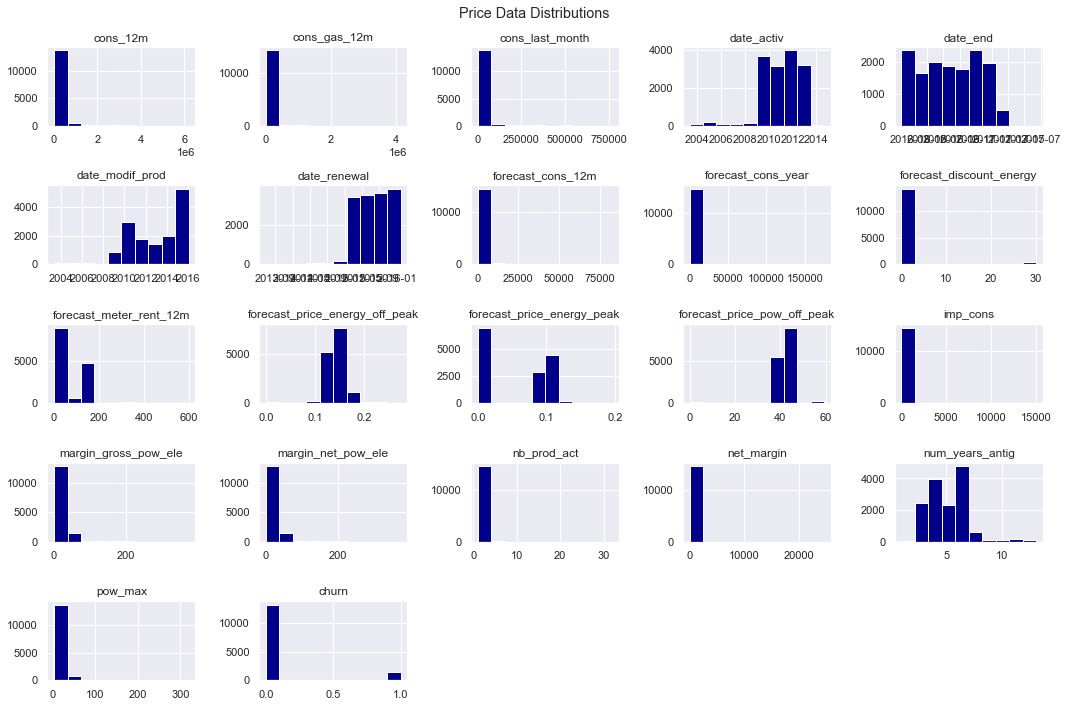

In [222]:
# Visualize distributions of numerical columns (Client Data)
client_df.hist(bins=10, figsize=(15, 10), edgecolor='white', color='darkblue')
plt.suptitle("Price Data Distributions")
plt.tight_layout()
plt.show()

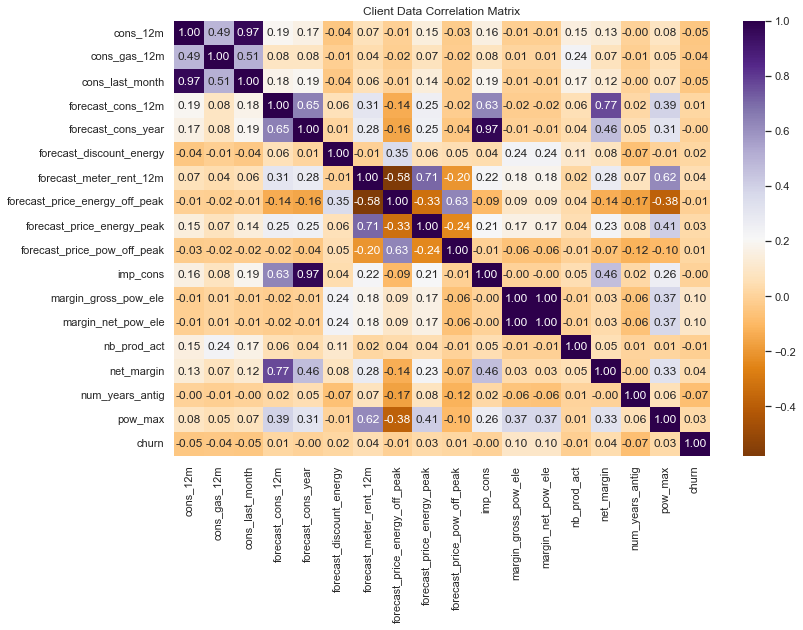

In [269]:
# Check correlation in Client Data
plt.figure(figsize=(12, 8))
corr_matrix = client_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="PuOr")
plt.title("Client Data Correlation Matrix")
plt.show()


## Data Visualization

### Initiallizing the plot functions

In [257]:
# 1

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_, color=['darkblue','orange']
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

# 2

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

# 3

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, color=['darkblue','orange'])
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### Churn percentage

In [235]:
churn_df = client_df[['id','churn']]
churn_df.columns = ['Companies', 'churn']
# churn_df
churn_df_total = churn_df.groupby(churn_df['churn']).count()
churn_df_percentage = churn_df_total/churn_df_total.sum() *100
churn_df_percentage

,Companies
churn,
0,90.284814
1,9.715186


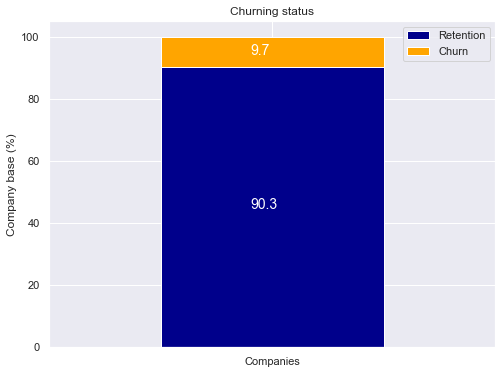

0    13187
1     1419
Name: churn, dtype: int64


In [236]:
# Plot

plot_stacked_bars(churn_df_percentage.transpose(), "Churning status", (8, 6), legend_=1)
print(churn_df['churn'].value_counts())

#### ----------- Nearly 10% of the customers has been churned and the rest are retained.

### Sales channel

####  To understand which sales channels have higher churn rates,

In [237]:
channel = client_df[['id','channel_sales','churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
# The unstack function rearranges the data, creating separate columns for each churn status (e.g., churned or not)

# THEN TO calculate the percentage, 
channel_percentage = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
channel_percentage

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


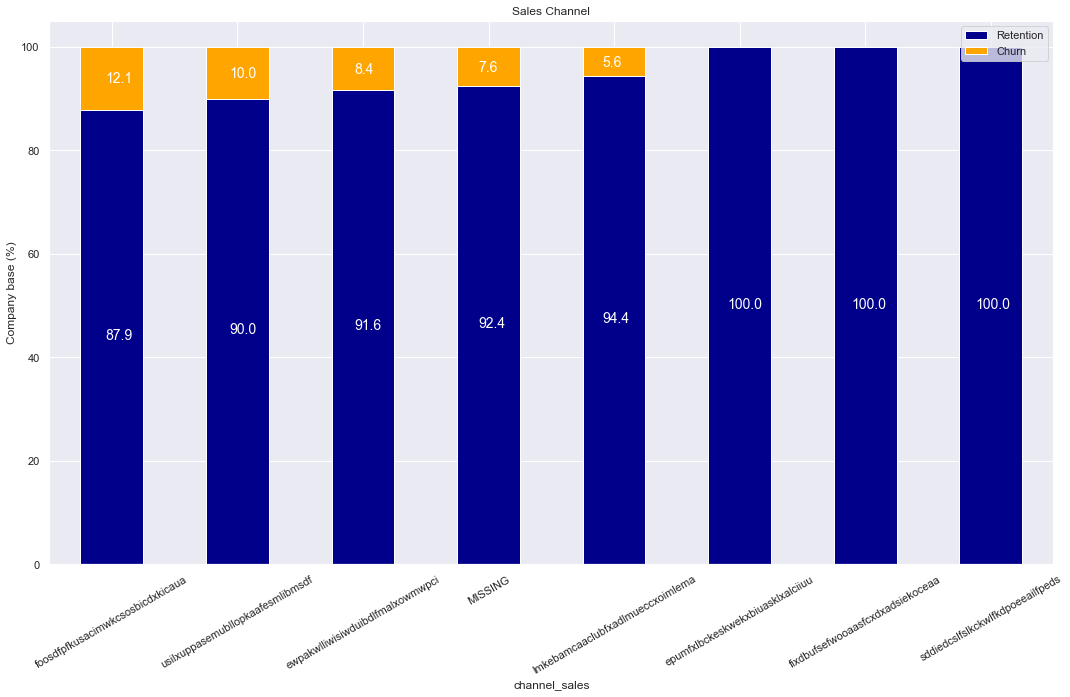

In [238]:
# Plot
plot_stacked_bars(channel_percentage, 'Sales Channel', size_=(18, 10), rot_=30, legend_="upper right")

#### ------------- The churning is for 5 different sales channel categories. Also, `MISSING` channel has a 7.6% churn rate. 

### Consumption

#### To see analyze consumption patterns across different timeframes and gas usage, which may correlate with churn.

In [239]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,0,54946,0,0.00,t,1
1,4660,0,0,0.00,f,0
2,544,0,0,0.00,f,0
3,1584,0,0,0.00,f,0
4,4425,0,526,52.32,f,0
...,...,...,...,...,...,...
14601,32270,47940,0,0.00,t,0
14602,7223,0,181,15.94,f,1
14603,1844,0,179,18.05,f,1
14604,131,0,0,0.00,f,0


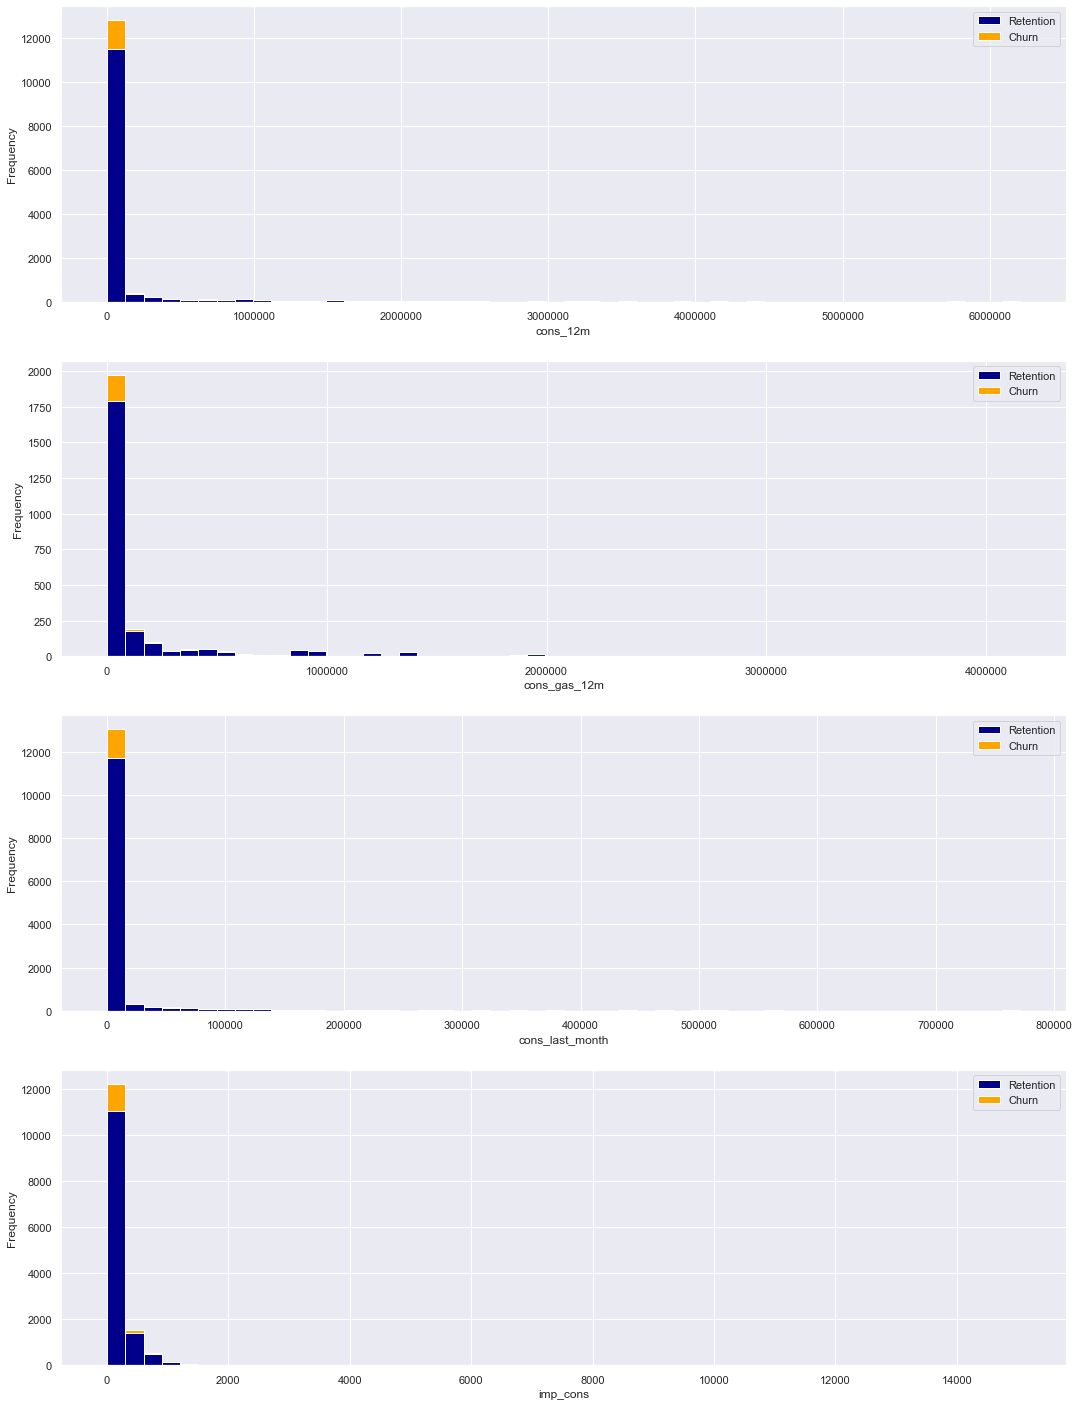

In [258]:
# Plot
# To set up a figure with 4 rows of subplots
fig, ax = plt.subplots(nrows =4,figsize=(18,25))
#  electricity consumption of the past 12 months
plot_distribution(consumption, 'cons_12m', ax[0])
# gas consumption of the past 12 months and the clients who has gas
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m',ax[1])
# Consumption for the last month
plot_distribution(consumption, 'cons_last_month', ax[2])
# current paid consumption
plot_distribution(consumption, 'imp_cons', ax[3])


#### ----------- The graph is skewed, as it has higher distribution towards the left and considerably neglible values towards the right end. This pattern can be mainly observed due to the presence of outliers in the datasets. 
#### To observe the outliers more closely, we can plot boxplots. A boxplot is a common visual representation of the distribution using a five-number summary as the basis: Minimum, First quartile (Q1), Median, Third quartile (Q3), Maximum. Additionally, it can reveal the degree to which the data is grouped, symmetrical, and skewed.

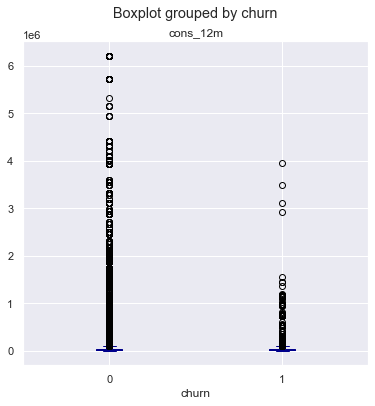

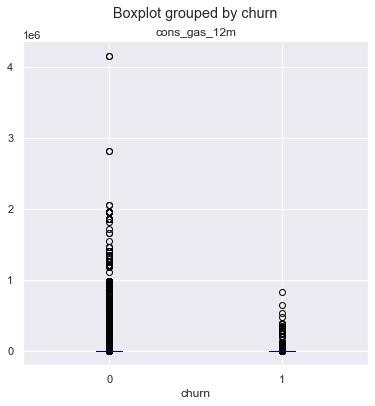

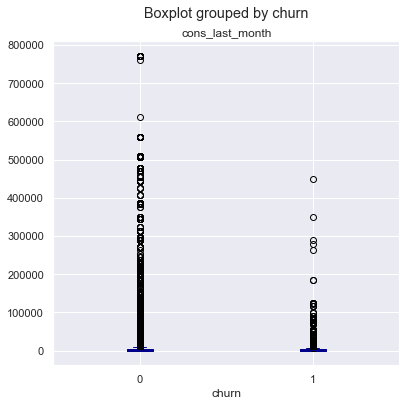

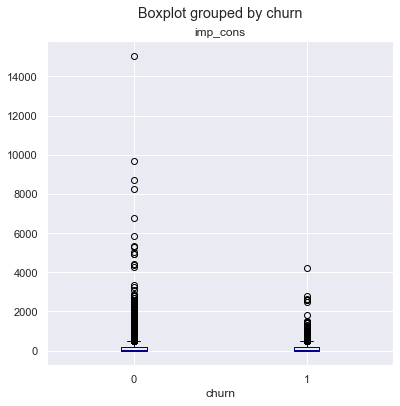

In [259]:
consumption_box = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']]

for col in consumption_box:
    client_df.boxplot(column=col, by='churn', figsize=(6,6), color='darkblue')
    plt.title(col)
plt.show()

### Forecast

In [122]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

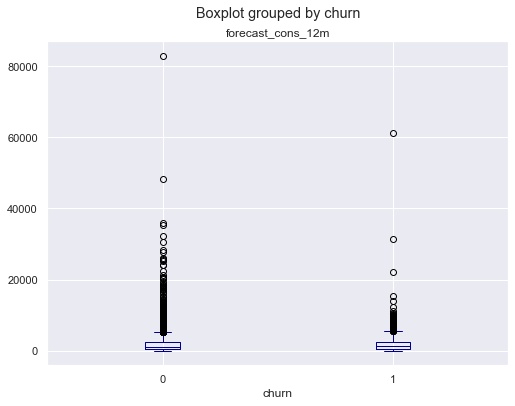

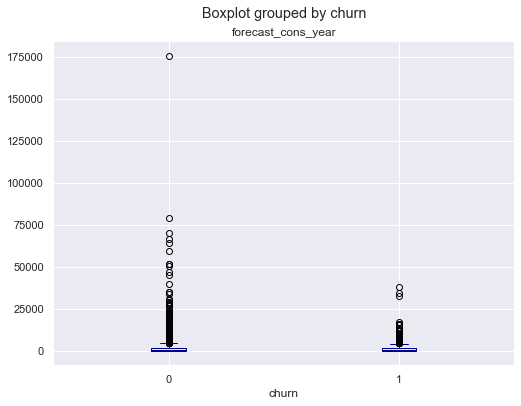

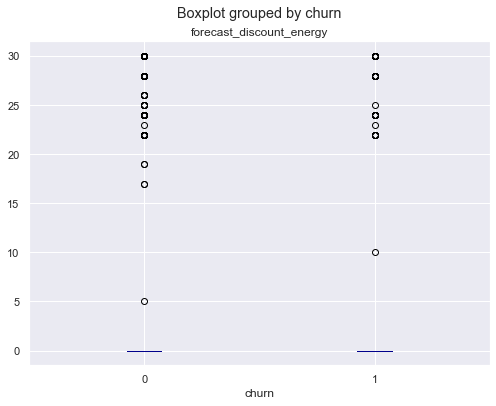

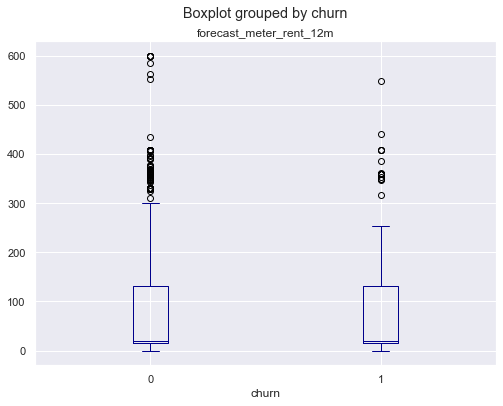

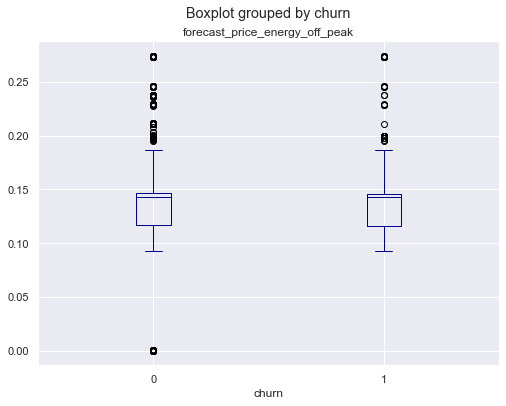

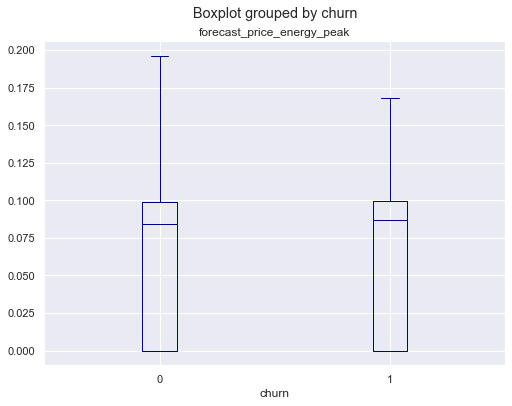

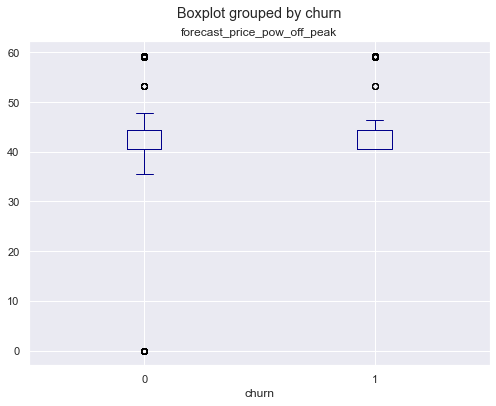

In [243]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(8,6), color='darkblue')
    plt.title(col)
plt.show()

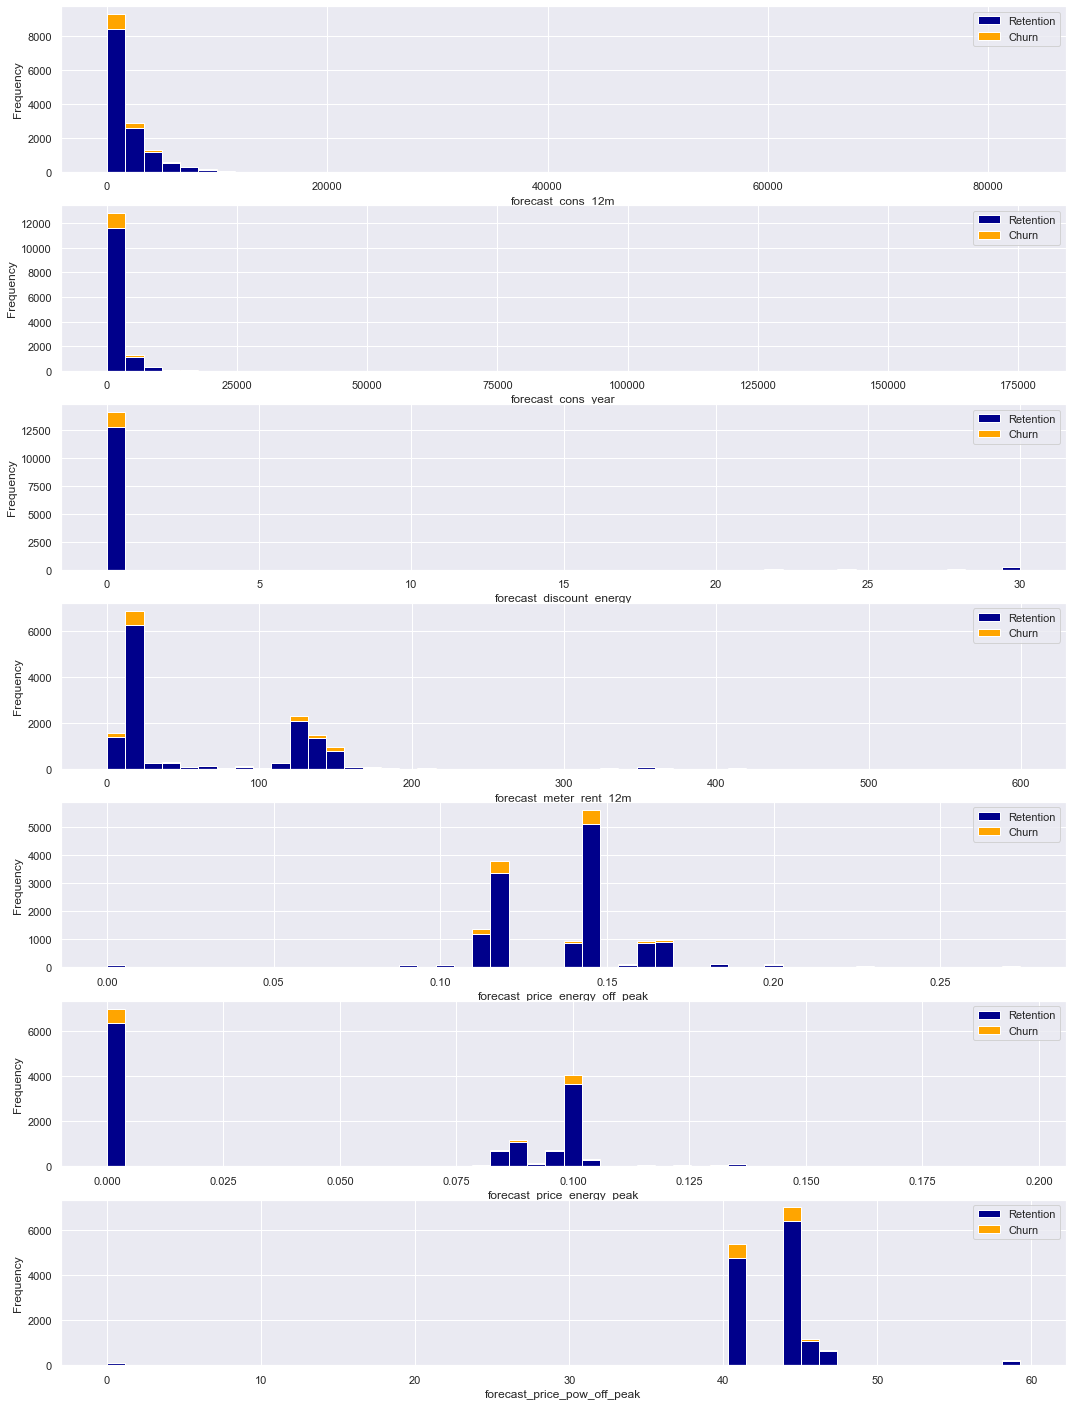

In [260]:
# Plot

fig, axs = plt.subplots(nrows=7, figsize=(18,25))

# forecasted electricity consumption for next 12 months
plot_distribution(client_df, "forecast_cons_12m", axs[0])

# forecasted electricity consumption for the next calendar year
plot_distribution(client_df, "forecast_cons_year", axs[1])

# forecasted value of current discount
plot_distribution(client_df, "forecast_discount_energy", axs[2])

# forecasted bill of meter rental for the next 2 months
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])

# forecasted energy price for 1st period (off peak)
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])

# forecasted energy price for 2nd period (peak)
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])

# forecasted power price for 1st period (off peak)
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])


#### -------- Here, also the values are skwed and outliers are present

### Contract type

In [245]:
contract_type = client_df[['id','has_gas','churn']]
contract_count = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract_count.div(contract_count.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=True)

In [246]:
contract_percentage

churn,0,1
has_gas,,
t,91.814410,8.185590
f,89.945629,10.054371


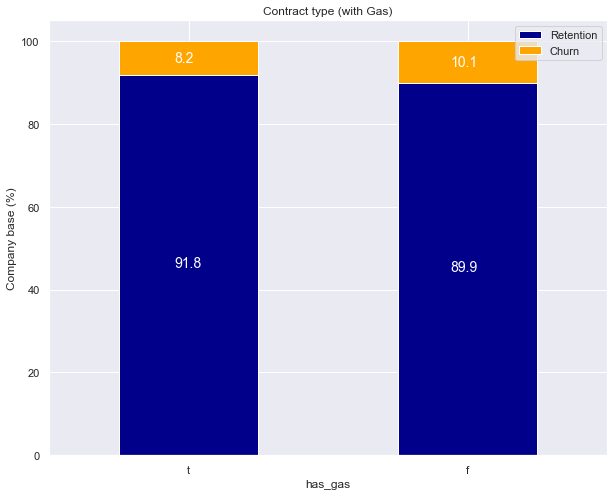

In [247]:
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)', size_=(10, 8), rot_=0, legend_="upper right")

#### ------------ Even though the churn percentage differs by only a samll amount, its even more for those client who does not have gas consumption

### Margin

In [248]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


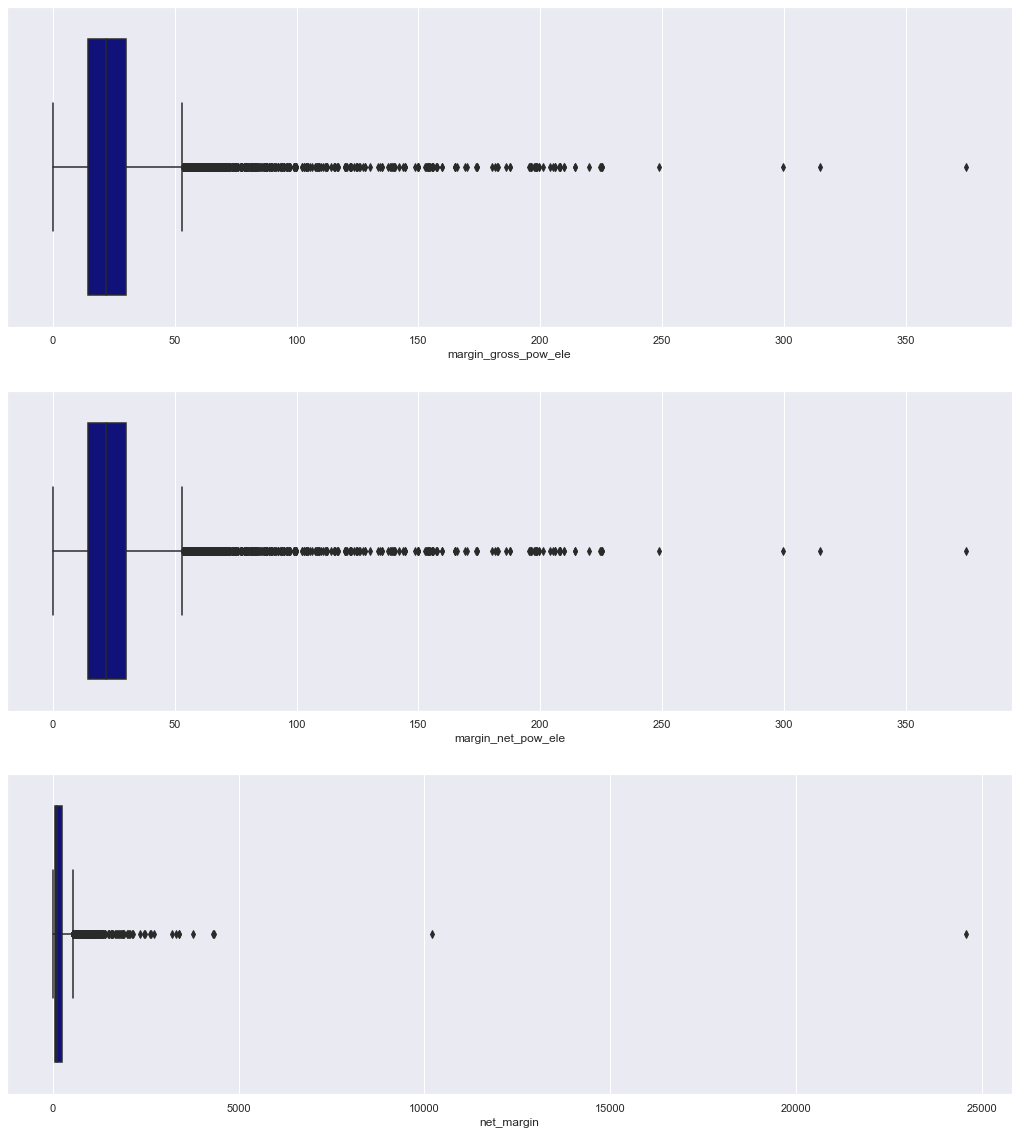

In [249]:
# Plot
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0],color='darkblue')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1],color='darkblue')
sns.boxplot(margin["net_margin"], ax=axs[2],color='darkblue')
plt.show()

#### ---------- We can notice certain outliers in this data

### Subscribed Power

In [250]:
power = client_df[['id', 'pow_max', 'churn']]
# power

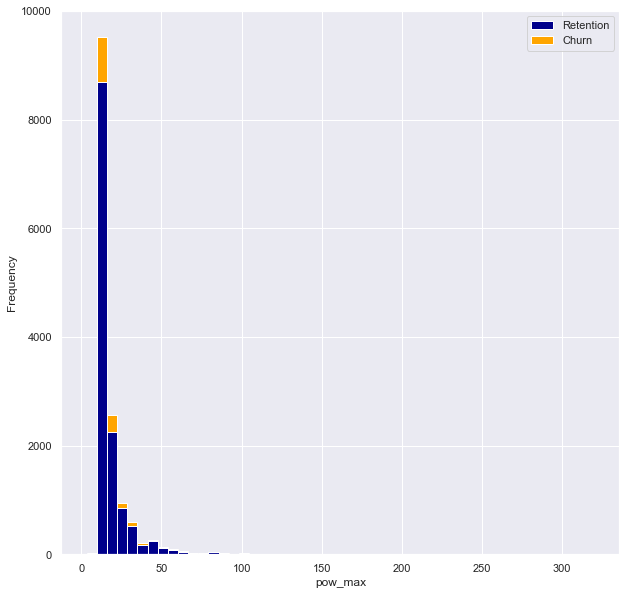

In [261]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [161]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

In [162]:
products_counts = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products_counts.div(products_counts.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [163]:
products_percentage

churn,0,1
nb_prod_act,,
4,90.000000,10.000000
1,90.018371,9.981629
3,90.057361,9.942639
5,90.322581,9.677419
2,91.492843,8.507157
6,100.000000,NaN
8,100.000000,NaN
9,100.000000,NaN
10,100.000000,NaN


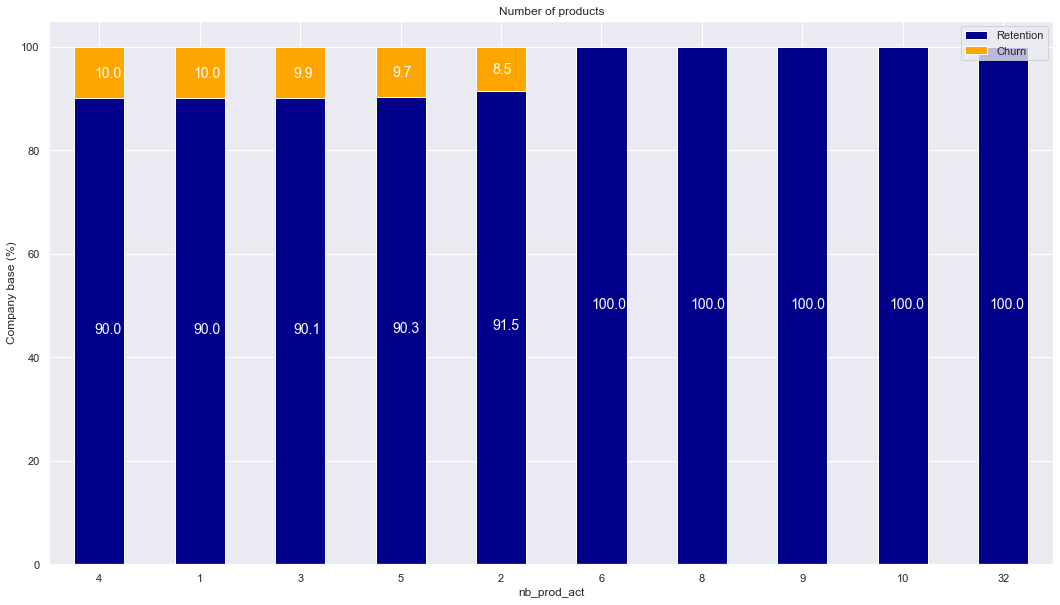

In [262]:
plot_stacked_bars(products_percentage, "Number of products")

In [186]:
years_counts = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_percentage = (years_counts.div(years_counts.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [187]:
years_percentage

churn,0,1
num_years_antig,,
2,72.727273,27.272727
3,86.477600,13.522400
4,88.146660,11.853340
12,90.000000,10.000000
5,91.368148,8.631852
7,91.748527,8.251473
13,92.307692,7.692308
6,92.891592,7.108408
11,93.513514,6.486486


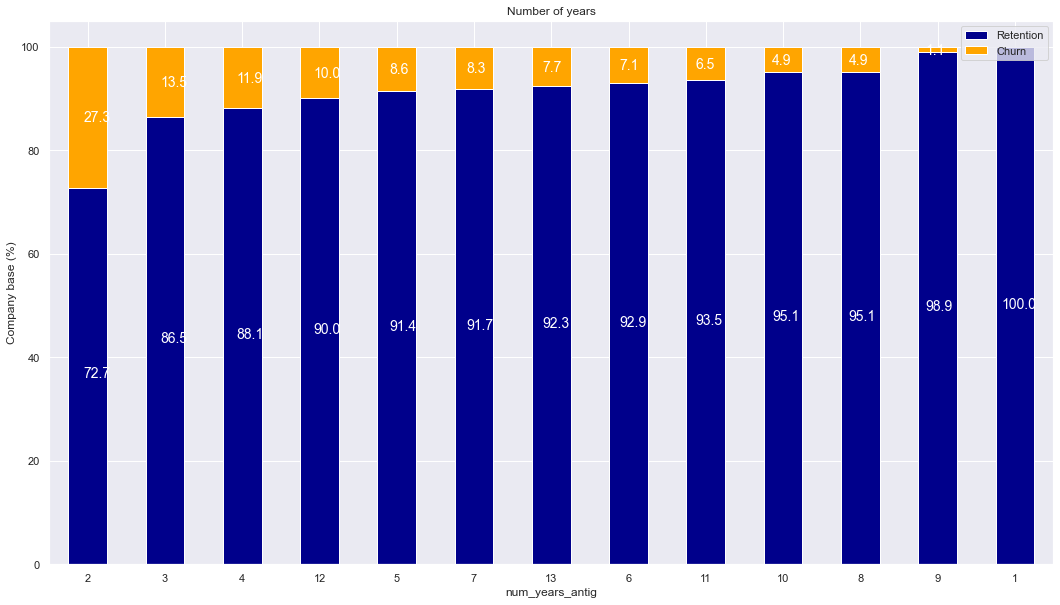

In [263]:
plot_stacked_bars(years_percentage, "Number of years")

In [190]:
origin_counts = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin_counts.div(origin_counts.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
origin_percentage

churn,0,1
origin_up,,
lxidpiddsbxsbosboudacockeimpuepw,87.417219,12.582781
ldkssxwpmemidmecebumciepifcamkci,91.613723,8.386277
MISSING,93.750000,6.250000
kamkkxfxxuwbdslkwifmmcsiusiuosws,93.991616,6.008384
ewxeelcelemmiwuafmddpobolfuxioce,100.000000,NaN
usapbepcfoloekilkwsdiboslwaxobdp,100.000000,NaN


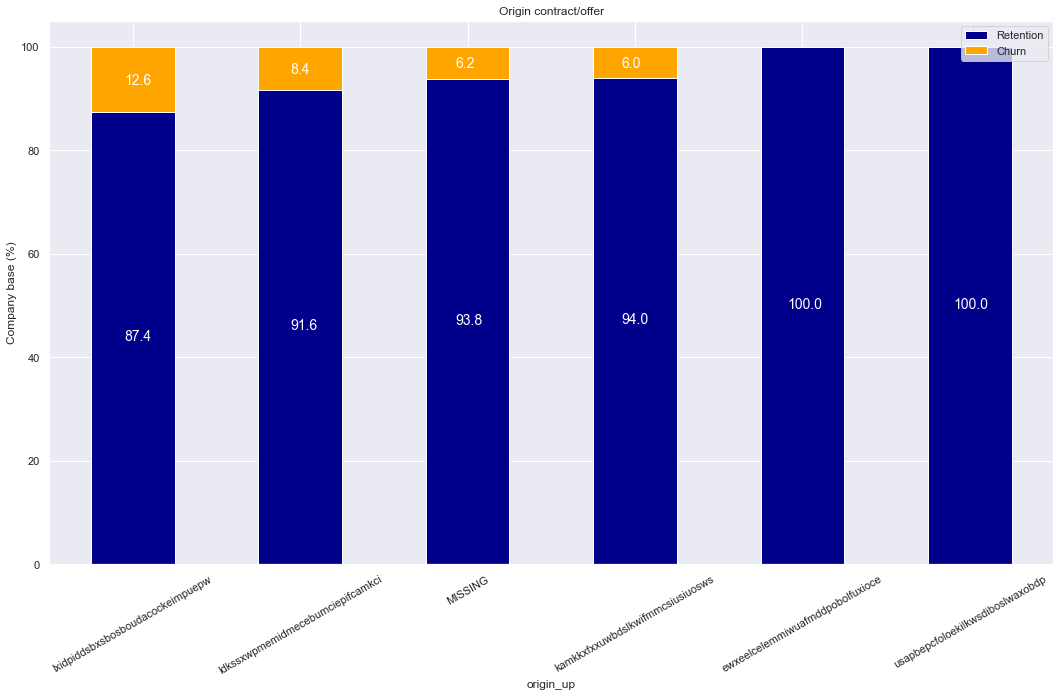

In [264]:
plot_stacked_bars(origin_percentage, "Origin contract/offer",size_=(18, 10), rot_=30)


### Price dataset

In [195]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [198]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

Most customers have a 12-month price records each

In [203]:
price_cols = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']

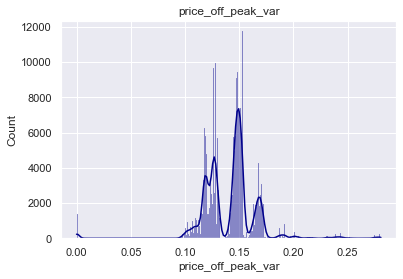

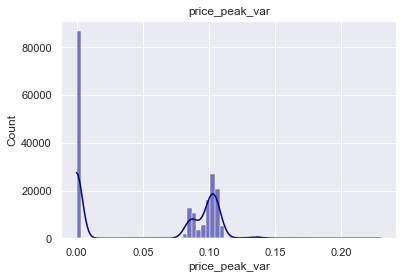

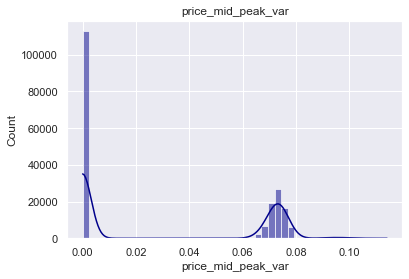

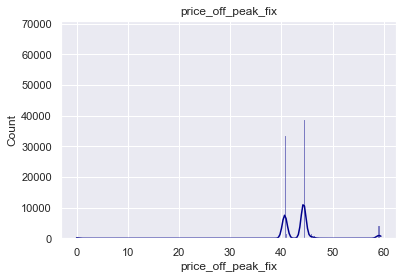

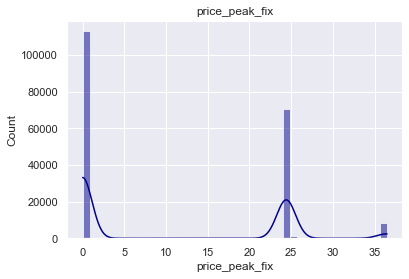

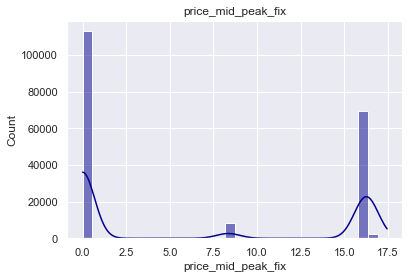

In [265]:
for i in price_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=price_df[i], kde=True, color='darkblue')
    plt.title(i)
    plt.show()

#### ------------- We can see that the values are centered around some points. And there are high peaks and no peaks for certain range of values

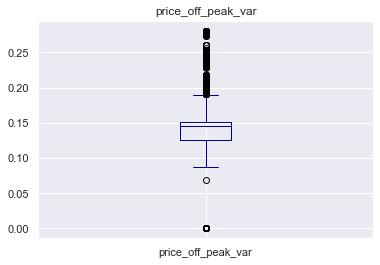

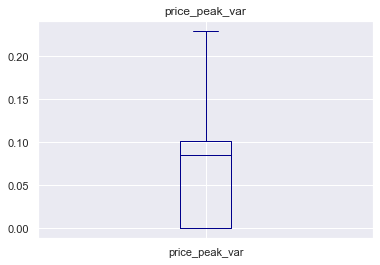

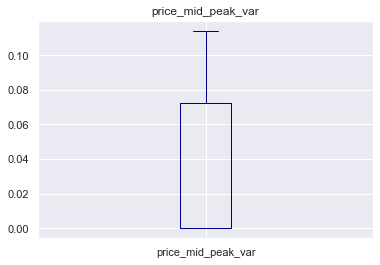

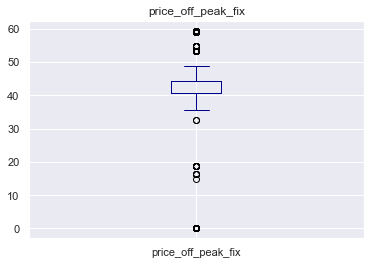

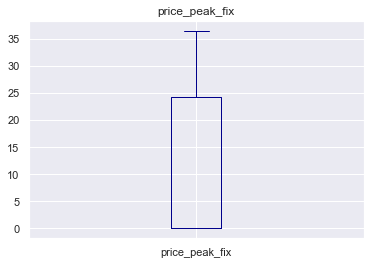

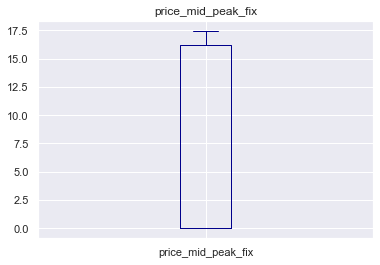

In [216]:
for i in price_cols:
    plt.figure(figsize=(6,4))
    price_df.boxplot(column = i, color='darkblue')
    plt.title(i)
plt.show()

#### Outliers are present in the data

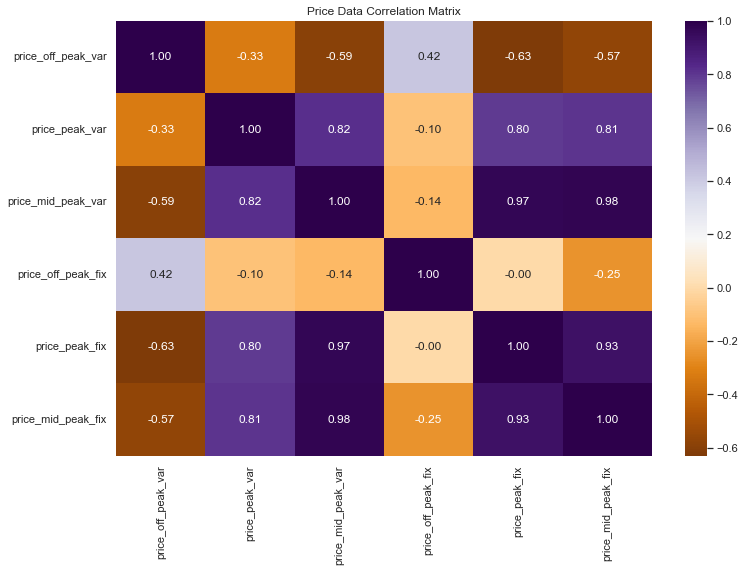

In [268]:
# Check correlation in Price Data
plt.figure(figsize=(12, 8))
corr_matrix_p = price_df.corr()
sns.heatmap(corr_matrix_p, annot=True, fmt=".2f", cmap="PuOr") 
plt.title("Price Data Correlation Matrix")
plt.show()


#### -------------- The heatmap suggests strong correlations among mid-peak and peak prices, meaning these price variables influence one another. 
#### -------------- Off-peak prices (e.g., price_off_peak_var) behave independently, often negatively correlated with peak prices, reflecting pricing strategies to balance energy demand.


### Hypothesis

To analyze customer price sensitivity, we consider the following:
- If prices increase and customers churn, they are likely sensitive to price.
- If prices remain unchanged or decrease and churn still occurs, price sensitivity may not be the main factor.

Using consumption data from 2015, we will create new features to measure price sensitivity by calculating the average consumption over three timeframes: the entire year, the last 6 months, and the last 3 months. This helps identify how recent price changes influence churn.

We need average price metrics for customers over three timeframes:

- Yearly (2015)
- Last 6 months (after June 2015)
- Last 3 months (after October 2015)

Finally, a correlation matrix and heatmap are to be plotted to analyze relationships between price averages and churn.

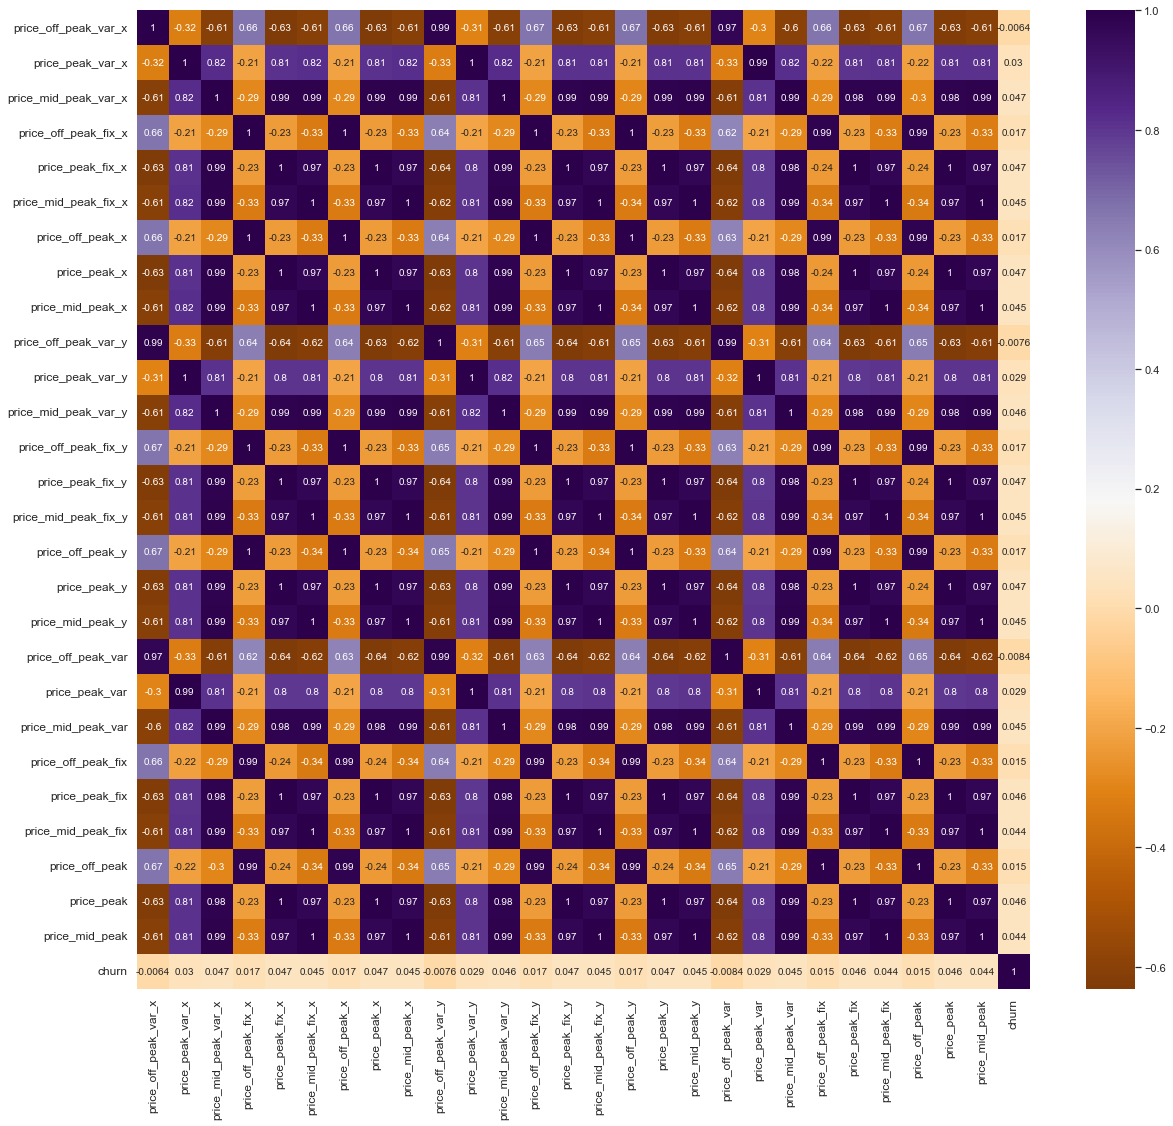

In [304]:
def calculate_mean(df, date_filter=None):
    if date_filter:
        df = df[df['price_date'] > date_filter]
    return df.groupby('id').mean().reset_index()

# Compute averages
mean_year = calculate_mean(price_df)
mean_6m = calculate_mean(price_df, '2015-06-01')
mean_3m = calculate_mean(price_df, '2015-10-01')

# Add total prices
for mean_df in [mean_year, mean_6m, mean_3m]:
    mean_df['price_off_peak'] = mean_df['price_off_peak_var'] + mean_df['price_off_peak_fix']
    mean_df['price_peak'] = mean_df['price_peak_var'] + mean_df['price_peak_fix']
    mean_df['price_mid_peak'] = mean_df['price_mid_peak_var'] + mean_df['price_mid_peak_fix']

# Merge results
price_features = mean_year.merge(mean_6m, on='id').merge(mean_3m, on='id')
price_churn = price_features.merge(client_df[['id', 'churn']], on='id')

# Calculate correlation
corr = price_churn.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='PuOr', annot=True, annot_kws={'size': 10})
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()


### To merge and save the final draft as df

In [305]:
final_churn_df = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')


In [306]:
final_churn_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_off_peak,price_peak,price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [307]:
final_churn_df.to_csv('final_churn_df.csv')